Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

**Jordan Earle** (12297127)

**Natasja Wezel** (11027649)

In [26]:
import numpy as np
import matplotlib.pyplot as plt

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph.

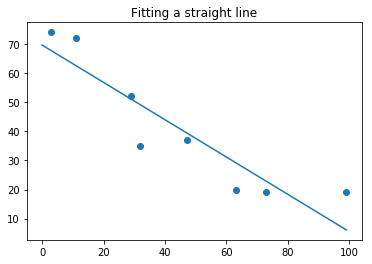

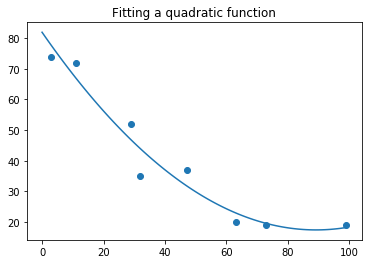

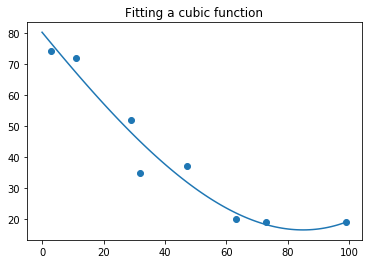

In [27]:
t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)

# make a line y = ax + b
A = np.vstack([t, np.ones(len(t))]).transpose()

m, b = np.linalg.lstsq(A, w, rcond=None)[0]

linemxb = []
squaremxb = []
cubemxb = []

for x in range(0, 100):
    linemxb.append((m*x) + b)
    
plt.figure(0)
plt.title("Fitting a straight line")
plt.scatter(t,w)
plt.plot(range(0,100), linemxb)

# make a quadratic function y = ax^2 + bx + c
tsquare = t**2

Asquared = np.vstack([tsquare, A.transpose()]).transpose()

a, b , c = np.linalg.lstsq(Asquared, w, rcond=None)[0]

for x in range(0, 100):
    squaremxb.append(a*(x**2) + b*x + c)

plt.figure(1)
plt.title("Fitting a quadratic function")
plt.scatter(t,w)
plt.plot(range(0,100), squaremxb)

# make a cubed function y = ax^3 + bx^2 + cx + d
tcubed = t**3

Acubed = np.vstack([tcubed, Asquared.transpose()]).transpose()

a,b,c,d = np.linalg.lstsq(Acubed, w, rcond=None)[0]

for x in range(0, 100):
    cubemxb.append(a*(x**3) + b*(x**2) + c * x + d)

plt.figure(2)
plt.title("Fitting a cubic function")
plt.scatter(t,w)
plt.plot(range(0,100), cubemxb)


## (b) Compute the condition number of the associated Vandermonde matrix in each case.

In [28]:
Vm1 = np.vstack([np.ones(len(t)),t]).transpose()
Vm2 = np.vstack([np.ones(len(t)),t,tsquare]).transpose()
Vm3 = np.vstack([np.ones(len(t)),t,tsquare,tcubed]).transpose()

# so cond(x, p = None) uses 2 norm
condition_Vm1 = np.linalg.cond(Vm1)
print("Linear function:", condition_Vm1)

condition_Vm2 = np.linalg.cond(Vm2)
print("Quadratic function:", condition_Vm2)

condition_Vm3 = np.linalg.cond(Vm3)
print("Cubic function:", condition_Vm3)



Linear function: 95.97978844376205
Quadratic function: 10562.214789189244
Cubic function: 1192946.8771620495


As the functions become more fitted to the data, the inputs can cause major effects to the output.  The higher order functions are more fit to the data, and therefor will change much more with a small change to the input data. 

----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

In [29]:
# i don't know how to set the colors for the contourplot properly and that's why we need a list like this
color_list = ["red", "blue","green","orange","black", "sandybrown", "grey", "darkgreen", "darkblue", "purple"]

def solve_cartesian(x,y):
    # in A theres 5 columns for yy, xy, x, y, 1
    A = np.stack([y*y, x*y, x, y, np.ones(len(x))]).transpose()

    # these are the coefficients for the function , found by the least squares method
    a,b,c,d,e = np.linalg.lstsq(A, x*x, rcond=-1)[0]

    print("The coefficients are: ", a,b,c,d,e)

    # how to make a proper linspace for this function?
    linspace_x = np.linspace(-1, 2, 100)
    linspace_y = np.linspace(-1, 2, 100)

    X, Y = np.meshgrid(linspace_x,linspace_y)

    # i'm not sure if this is right I saw it on stackoverflow somewhere
    F = a * Y**2 + b * X * Y + c * X + d * Y + e - X**2 

    return X,Y,F

The coefficients are:  -2.635625483712108 0.1436461825988934 0.5514469631403587 3.2229403381059 -0.4328942702644514


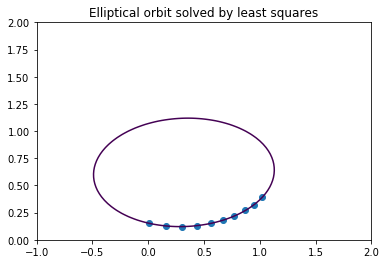

In [30]:
x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

unperturbed_X,unperturbed_Y,unperturbed_F = solve_cartesian(x,y)

# plot it
plt.contour(unperturbed_X,unperturbed_Y,unperturbed_F,[0.0])
plt.title("Elliptical orbit solved by least squares")
plt.scatter(x,y)
plt.xlim(-1,2)
plt.ylim(0,2)
plt.show()


## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

The coefficients are:  -2.635625483712084 0.14364618259888629 0.5472315310162317 3.2231812422182817 -0.43169805646582016
The coefficients are:  -2.635625483712083 0.14364618259889383 0.5564633817463784 3.2422244274998886 -0.4465027677088723
The coefficients are:  -2.6356254837120856 0.1436461825988995 0.5560680933447464 3.2319765017035476 -0.4399916732155721
The coefficients are:  -2.635625483712103 0.14364618259890127 0.5557261267720721 3.2459676073094292 -0.4486013294559491
The coefficients are:  -2.635625483712119 0.14364618259890116 0.5564828655841161 3.214486683158284 -0.4292771531358702
The coefficients are:  -2.6356254837120985 0.14364618259890005 0.546175368755357 3.2201289116075764 -0.42947038663295845
The coefficients are:  -2.6356254837120905 0.14364618259889284 0.5531032411260595 3.2081911200667 -0.42429907735461636
The coefficients are:  -2.635625483712056 0.14364618259887751 0.5533492146241719 3.20235294793219 -0.4207769599291691
The coefficients are:  -2.635625483712106 

<Figure size 432x288 with 0 Axes>

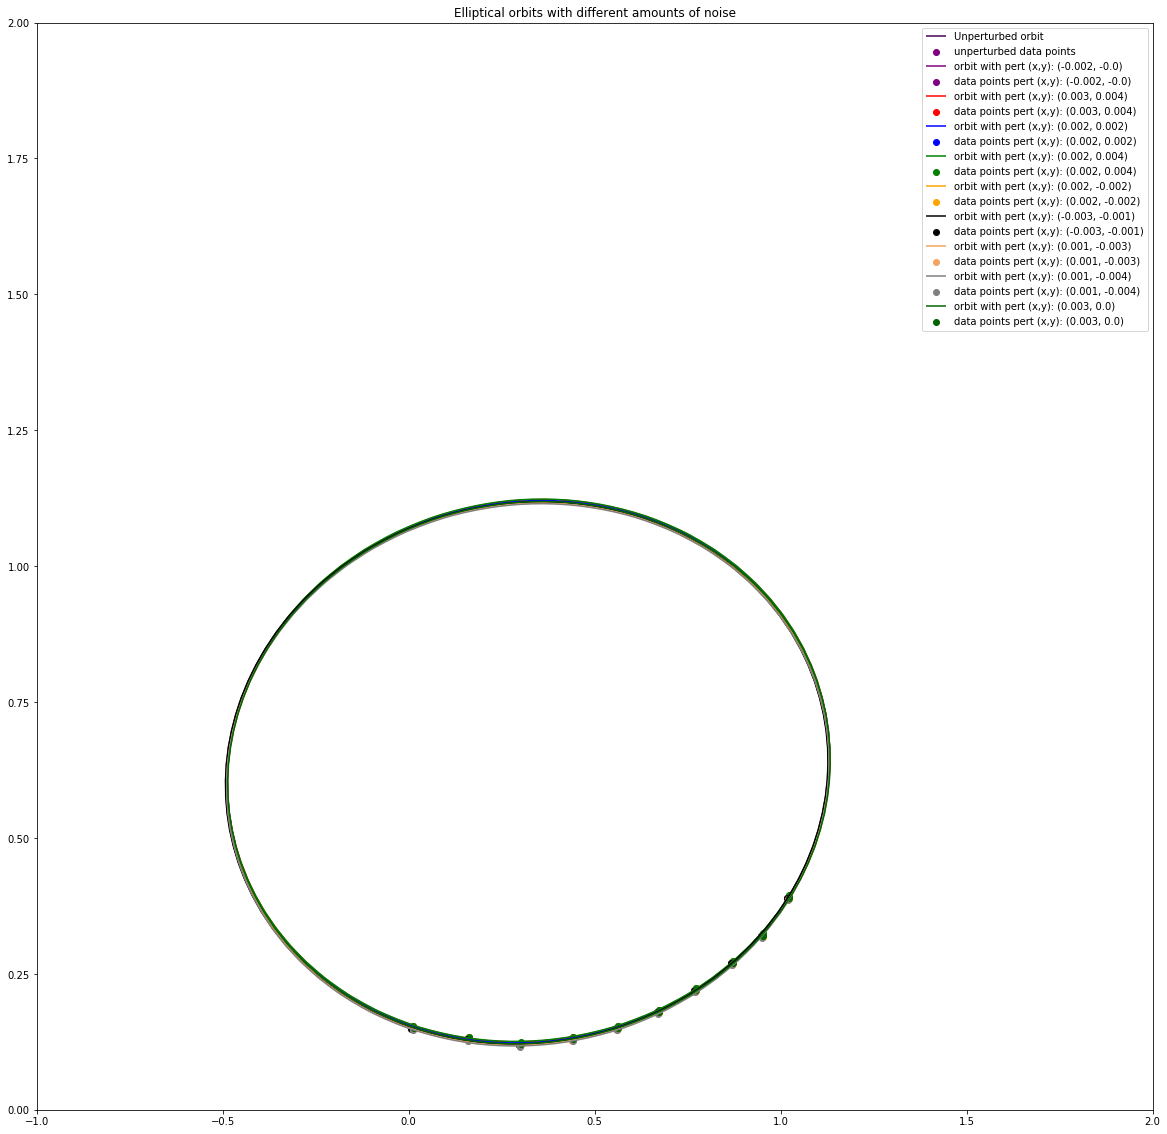

In [61]:
plt.figure(0)
plt.figure(figsize=(20,20))

# plot the unperturbed data
CS = plt.contour(unperturbed_X,unperturbed_Y,unperturbed_F,[0.0])
CS.collections[0].set_label("Unperturbed orbit")
plt.scatter(x,y, color="purple", label="unperturbed data points")

for i in range(0, 9):
    
    Xrand = np.random.rand()/100 - 0.005
    Yrand = np.random.rand()/100 - 0.005
    
    x2 = x + Xrand
    y2 = y + Yrand

    X, Y, F = solve_cartesian(x2,y2)

    # plot it
    CS = plt.contour(X,Y,F,[0.0], colors=color_list[i - 1])
    plt.scatter(x2,y2, color=color_list[i - 1], label="data points pert (x,y): (" + str(round(Xrand,3))+", " + str(round(Yrand,3))+")")
    
    CS.collections[0].set_label("orbit with pert (x,y): (" + str(round(Xrand,3))+", " + str(round(Yrand,3))+")")

plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.title("Elliptical orbits with different amounts of noise")
plt.show()


The coefficients are:  -2.6356254837120723 0.1436461825989117 0.5754145498899186 3.563973716828136 -0.6633697207709408
The coefficients are:  -2.635625483712092 0.14364618259889006 0.6146390138074216 3.3827495820267526 -0.5558028520976157
The coefficients are:  -2.635625483712051 0.1436461825988966 0.5541474131101997 3.7016360259277405 -0.7524182187513566
The coefficients are:  -2.635625483712016 0.14364618259886386 0.663815333829628 3.3748656695800388 -0.5686872973726639
The coefficients are:  -2.6356254837120168 0.1436461825988744 0.6320467737684202 3.6217107340624732 -0.7231825063117208
The coefficients are:  -2.6356254837120554 0.14364618259888584 0.5840710717958391 3.38702782355822 -0.547999416806889
The coefficients are:  -2.635625483712086 0.14364618259888884 0.5698128009195362 3.215488490648814 -0.43424285943307495
The coefficients are:  -2.6356254837120807 0.1436461825988945 0.6971536798694252 3.6459621631075674 -0.7650609061201799
The coefficients are:  -2.6356254837120714 0.

<Figure size 432x288 with 0 Axes>

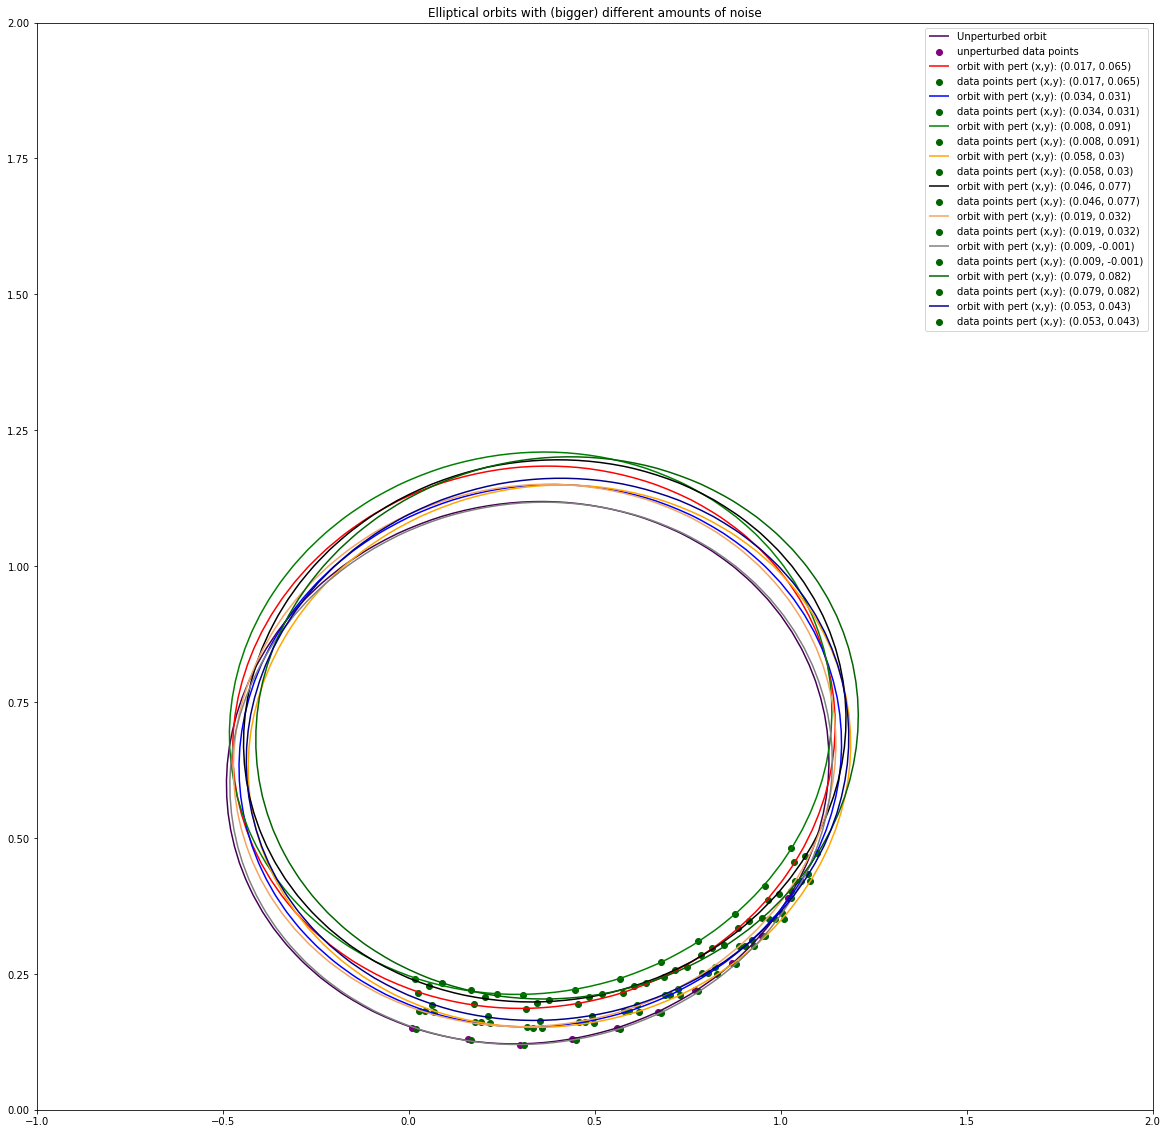

In [60]:
plt.figure(0)
plt.figure(figsize=(20,20))

# plot the unperturbed data
CS = plt.contour(unperturbed_X,unperturbed_Y,unperturbed_F,[0.0])
CS.collections[0].set_label("Unperturbed orbit")
plt.scatter(x,y, color="purple", label="unperturbed data points")

for noise in range(1, 10):
    
    Xrand = np.random.rand()/10 - 0.005
    Yrand = np.random.rand()/10 - 0.005
    
    x2 = x + Xrand
    y2 = y + Yrand

    X, Y, F = solve_cartesian(x2,y2)

    # plot it
    CS = plt.contour(X,Y,F,[0.0], colors=color_list[noise - 1])
    plt.scatter(x2,y2, color=color_list[i - 1], label="data points pert (x,y): (" + str(round(Xrand,3))+", " + str(round(Yrand,3))+")")
    
    CS.collections[0].set_label("orbit with pert (x,y): (" + str(round(Xrand,3))+", " + str(round(Yrand,3))+")")


plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.title("Elliptical orbits with (bigger) different amounts of noise")
plt.show()


Even with the system being rank deficient, a small amount of noise will not effect the fitting of the system.  There is not a lot of difference between the outputs.  This could be different for a more constrained (higher order) problem.  Since the data is all being shifted the shape does not alter, if the points were being moved independent of each other, we would expect the shape of the ellips to change to suit the changed points

The coefficients from the second plot (with more noise) differ more from the coefficients from the unperturbed data than the coefficients from the first plot. We see that the first two coefficients stay pretty much the same all the time.

## (c)
Can you explain this behaviour?

The noise causes perturbations in the inputs, which will cause changes to the output.  As the system is rank difficient, the system is sensitive to perturbations in the input data (the noise).  As the least squares method was used to make the R-matrix, the system is correspondingly sensitive to perturbations in the problem data as can be seen in the graphs above.

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^{-k}$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?

0.10441934702027524 0.340136609715485 0.8917887094168335 0.20248793097774528 -0.1717893875606339
0.41916487843578665 0.8768712738778587 0.5253450105330469 0.756138531245889 -0.16744777429279734
-2.635625483712108 0.1436461825988934 0.5514469631403587 3.2229403381059 -0.4328942702644514
-2.635625483712108 0.1436461825988934 0.5514469631403587 3.2229403381059 -0.4328942702644514
-2.635625483712108 0.1436461825988934 0.5514469631403587 3.2229403381059 -0.4328942702644514


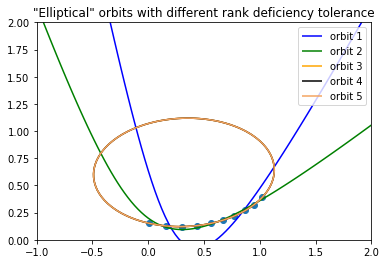

In [71]:
# HEY! This is a reminder for the mroning that I dont see the arguement rcond in here.   

# in A theres 5 columns for yy, xy, x, y, 1

A = np.stack([y*y, x*y, x, y, np.ones(len(x))]).transpose()

for k in range(1, 6):
    coefficient = 10**-(k)
    # these are the coefficients for the function , found by the least squares method
    a,b,c,d,e = np.linalg.lstsq(A, x*x, rcond=coefficient)[0]

    print(a,b,c,d,e)

    # how to make a proper linspace for this function?
    linspace_x = np.linspace(-1, 2, 100)
    linspace_y = np.linspace(-1, 2, 100)

    X, Y = np.meshgrid(linspace_x,linspace_y)

    # i'm not sure if this is right I saw it on stackoverflow somewhere
    F = a * Y**2 + b * X * Y + c * X + d * Y + e - X**2 

    # plot it
    CS = plt.contour(X,Y,F,[0.0], colors=color_list[k])

    CS.collections[0].set_label("orbit " + str(k))

    
plt.scatter(x,y)
plt.xlim(-1,2)
plt.ylim(0,2)
plt.legend()
plt.title("\"Elliptical\" orbits with different rank deficiency tolerance")
plt.show()



The Rcond argument determines what the cut-off ratio is for small singular values of a. This is necessary for the purpose of rank determination, singular values are treated as zero if they are smaller than rcond times the largest singular value of a.

We're increasing k from 1 to 5 and this makes the rcond argument smaller in every round. When rcond is decreases, it considers more significant digits before turning the variable to a zero.  Orbit 1 and 2 show that a higher value of rcond excludes variables, causing it to fit the data less.  The remainder (3,4 and 5) include those variables which keep it an ellips.  